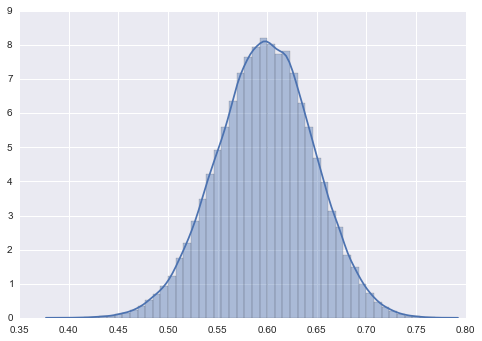

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

true_rates = np.random.uniform(0, 1, size=10000000) # array of 10,000,000 values from [0,1] chosen uniformly at rand

obs = np.random.binomial(100, true_rates) # array of single sample success rates from the 10,000,000 
                                          # bin(100, true_rates) random variables

obs60_indices = np.where(obs==60)         # array of indexes for above observations where # of successes = 60/100

sns.distplot(true_rates[obs60_indices])   # plot a histogram of observations where # of successes = 60/100
                                          # w/ x = underlying success probability

In [6]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([0, 1, 4])
print a>b, np.mean(a>b)

[ True  True False] 0.666666666667


<h2>An A/B Test</h2>
<p>Imagine we have two versions of a web page, an original, 'A', and a new version, 'B'. After running the tests we find:
    <ul>
        <li>Page A Conversion: 31 clicks / 642 views</li>
        <li>Page B Conversion: 44 clicks / 642 views</li>
    </ul>
</p>

In [7]:
import numpy as np

k_a, n_a = 31, 642
k_b, n_b = 44, 642

A_Samples = np.random.beta(k_a + 1, n_a - k_a + 1, size = 10000) # prior for both is beta(1,1)
B_Samples = np.random.beta(k_b + 1, n_b - k_b + 1, size = 10000)

# given these posterior distributions, P(B_Conv > A_Conv) is:
result = np.mean(A_Samples > B_Samples) # A_Samples > B_Samples returns array of booleans after pairwise comparison
                                        # and the mean is the proportion of these comparisons that returned True
print result

0.0605


<p>So we have a 6.05% chance that A is better than B and the 5% significance level of the test has not been achieved, so we fail to reject the null that A is better than B. <br>
Had we instead observed 66 clicks out of 642 views of Page B we would find:</p>

In [11]:
k_b = 66

A_Samples = np.random.beta(k_a + 1, n_a - k_a + 1, size = 10000) 
B_Samples = np.random.beta(k_b + 1, n_b - k_b + 1, size = 10000)

result = np.mean(A_Samples > B_Samples)

print result

0.0002


<p>And we are sure to reject the Null and consider Page B to have a higher conversion rate </p>

<h4>Credible Intervals</h4>
<p>Saw we would like to find a 95% credible interval for the posterior of Page B CTR. Imagine that we had a much longer test and our posterior is <br> <tt>Beta(435, 39000)</tt>. One solution is to find the interval in which the middle 95% of the samples lie.</p>

In [19]:
k_b, n_b = 435, 39000

B_Samples = np.random.beta(k_b + 1, n_b - k_b + 1, size = 10000)
lower_bound = np.percentile(B_Samples, 2.5)
upper_bound = np.percentile(B_Samples, 97.5)

print "The 95%% Credible Interval for the CTR of Page B is: (%f, %f)" % (lower_bound, upper_bound)

The 95% Credible Interval for the CTR of Page B is: (0.010157, 0.012244)
